<a href="https://colab.research.google.com/github/amrutha-m-sajeev/Machine-learning-using-Navie-Bayes-Algorithm/blob/main/cancer_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import numpy as np
import pandas as pd
df=pd.read_csv('/content/cancer patient data sets.csv')
df

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,P995,44,1,6,7,7,7,7,6,...,5,3,2,7,8,2,4,5,3,High
996,996,P996,37,2,6,8,7,7,7,6,...,9,6,5,7,2,4,3,1,4,High
997,997,P997,25,2,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
998,998,P998,18,2,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [27]:
df.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [28]:
df.tail()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
995,995,P995,44,1,6,7,7,7,7,6,...,5,3,2,7,8,2,4,5,3,High
996,996,P996,37,2,6,8,7,7,7,6,...,9,6,5,7,2,4,3,1,4,High
997,997,P997,25,2,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
998,998,P998,18,2,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High
999,999,P999,47,1,6,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High


In [29]:
df.columns

Index(['index', 'Patient Id', 'Age', 'Gender', 'Air Pollution', 'Alcohol use',
       'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
       'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
       'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
       'Weight Loss', 'Shortness of Breath', 'Wheezing',
       'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
       'Dry Cough', 'Snoring', 'Level'],
      dtype='object')

In [30]:
df.drop(['index','Patient Id'],axis='columns',inplace=True)
df

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,Low
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,High
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44,1,6,7,7,7,7,6,7,7,...,5,3,2,7,8,2,4,5,3,High
996,37,2,6,8,7,7,7,6,7,7,...,9,6,5,7,2,4,3,1,4,High
997,25,2,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
998,18,2,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High


In [31]:
df.isna().sum()

Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1000 non-null   int64 
 1   Gender                    1000 non-null   int64 
 2   Air Pollution             1000 non-null   int64 
 3   Alcohol use               1000 non-null   int64 
 4   Dust Allergy              1000 non-null   int64 
 5   OccuPational Hazards      1000 non-null   int64 
 6   Genetic Risk              1000 non-null   int64 
 7   chronic Lung Disease      1000 non-null   int64 
 8   Balanced Diet             1000 non-null   int64 
 9   Obesity                   1000 non-null   int64 
 10  Smoking                   1000 non-null   int64 
 11  Passive Smoker            1000 non-null   int64 
 12  Chest Pain                1000 non-null   int64 
 13  Coughing of Blood         1000 non-null   int64 
 14  Fatigue                  

In [33]:
x=df.iloc[:,:-1].values
x

array([[33,  1,  2, ...,  2,  3,  4],
       [17,  1,  3, ...,  1,  7,  2],
       [35,  1,  4, ...,  6,  7,  2],
       ...,
       [25,  2,  4, ...,  6,  7,  2],
       [18,  2,  6, ...,  4,  2,  3],
       [47,  1,  6, ...,  6,  7,  2]])

In [34]:
y=df.iloc[:,-1].values
y

array(['Low', 'Medium', 'High', 'High', 'High', 'High', 'Low', 'Low',
       'Medium', 'Medium', 'High', 'High', 'Medium', 'High', 'Low',
       'Medium', 'Medium', 'High', 'High', 'Medium', 'High', 'High',
       'High', 'High', 'High', 'Medium', 'Medium', 'Medium', 'High',
       'Medium', 'High', 'High', 'Medium', 'Low', 'Low', 'Medium', 'Low',
       'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
       'High', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
       'Low', 'Low', 'High', 'Low', 'Low', 'Low', 'Low', 'Low', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'High', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'High', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'High', 'High', 'High', 'Medium',
       'High', 'High', 'High', 'High', 'High', 'High', 'High', 'High',
       'High', 'High', 'Medium', 'High', 'High', 'High', 'High', 'High',
   

In [35]:
x.ndim

2

In [36]:
y.ndim

1

In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train

array([[28,  1,  6, ...,  4,  5,  3],
       [44,  1,  6, ...,  4,  5,  3],
       [32,  1,  2, ...,  2,  5,  1],
       ...,
       [36,  2,  2, ...,  3,  2,  3],
       [49,  1,  6, ...,  6,  7,  2],
       [49,  1,  6, ...,  6,  7,  2]])

In [38]:
x_test

array([[48,  2,  1, ...,  1,  2,  1],
       [62,  1,  6, ...,  3,  4,  2],
       [22,  1,  6, ...,  3,  4,  2],
       ...,
       [36,  1,  6, ...,  6,  7,  5],
       [28,  2,  3, ...,  3,  4,  3],
       [22,  2,  2, ...,  2,  1,  1]])

In [39]:
y_train

array(['High', 'High', 'Low', 'High', 'Low', 'Low', 'Medium', 'High',
       'High', 'Medium', 'Low', 'Medium', 'Medium', 'Low', 'High',
       'Medium', 'Low', 'Medium', 'Low', 'Low', 'High', 'Low', 'Medium',
       'Medium', 'High', 'Low', 'Medium', 'Low', 'Low', 'High', 'Low',
       'High', 'Low', 'Medium', 'Low', 'High', 'Low', 'High', 'High',
       'High', 'Low', 'Medium', 'Low', 'Low', 'Low', 'High', 'High',
       'Medium', 'Medium', 'Low', 'Medium', 'Low', 'Low', 'Medium',
       'Medium', 'High', 'Medium', 'High', 'High', 'Low', 'Low', 'Medium',
       'Medium', 'Low', 'Low', 'High', 'High', 'Medium', 'Low', 'Medium',
       'Low', 'Low', 'Medium', 'Low', 'Low', 'High', 'Low', 'Medium',
       'High', 'Low', 'Medium', 'Low', 'Medium', 'Medium', 'High', 'High',
       'Low', 'High', 'High', 'High', 'Medium', 'Low', 'High', 'High',
       'Low', 'Low', 'Medium', 'High', 'High', 'High', 'High', 'High',
       'High', 'High', 'Medium', 'High', 'Low', 'High', 'Low', 'Medium',
   

In [40]:
y_test

array(['Medium', 'Medium', 'Medium', 'High', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Low', 'Medium', 'Medium', 'Medium',
       'Low', 'High', 'Low', 'High', 'High', 'High', 'High', 'Medium',
       'Low', 'Medium', 'High', 'Low', 'Medium', 'High', 'Low', 'Low',
       'Low', 'High', 'Medium', 'Low', 'Low', 'High', 'High', 'Medium',
       'High', 'Low', 'High', 'High', 'Low', 'Medium', 'Medium', 'Low',
       'Low', 'Medium', 'High', 'Low', 'Medium', 'High', 'Low', 'High',
       'High', 'High', 'Low', 'High', 'High', 'Low', 'Medium', 'Low',
       'High', 'High', 'Low', 'Medium', 'High', 'High', 'Medium', 'High',
       'High', 'Low', 'Medium', 'Medium', 'Medium', 'Medium', 'High',
       'Low', 'Low', 'Medium', 'Medium', 'Medium', 'Low', 'Medium',
       'High', 'High', 'High', 'Low', 'High', 'High', 'Low', 'Low',
       'Medium', 'High', 'High', 'High', 'High', 'High', 'Medium', 'Low',
       'Low', 'High', 'Low', 'Low', 'Medium', 'High', 'High', 'Medium

In [41]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)
x_train

array([[-0.77378509, -0.79240582,  1.07873453, ...,  0.28447891,
         0.56712266,  0.04971651],
       [ 0.53850943, -0.79240582,  1.07873453, ...,  0.28447891,
         0.56712266,  0.04971651],
       [-0.44571146, -0.79240582, -0.90710155, ..., -0.80369178,
         0.56712266, -1.31505032],
       ...,
       [-0.11763783,  1.26197963, -0.90710155, ..., -0.25960644,
        -0.90866121,  0.04971651],
       [ 0.94860146, -0.79240582,  1.07873453, ...,  1.3726496 ,
         1.55097857, -0.63266691],
       [ 0.94860146, -0.79240582,  1.07873453, ...,  1.3726496 ,
         1.55097857, -0.63266691]])

In [42]:
x_test

array([[ 0.99299394,  1.12815215, -1.39055763, ..., -1.47761382,
        -0.9105992 , -1.28773151],
       [ 2.20890488, -0.88640526,  1.03201664, ..., -0.37216707,
         0.0650428 , -0.61820039],
       [-1.26512639, -0.88640526,  1.03201664, ..., -0.37216707,
         0.0650428 , -0.61820039],
       ...,
       [-0.04921544, -0.88640526,  1.03201664, ...,  1.28600305,
         1.5285058 ,  1.39039295],
       [-0.7440217 ,  1.12815215, -0.42152792, ..., -0.37216707,
         0.0650428 ,  0.05133072],
       [-1.26512639,  1.12815215, -0.90604277, ..., -0.92489045,
        -1.3984202 , -1.28773151]])

In [43]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array(['High', 'Medium', 'Medium', 'High', 'Medium', 'High', 'Medium',
       'Medium', 'Medium', 'Medium', 'Low', 'Medium', 'Medium', 'Medium',
       'Low', 'High', 'Low', 'High', 'High', 'High', 'High', 'Medium',
       'Medium', 'Medium', 'High', 'Medium', 'Medium', 'High', 'Low',
       'Low', 'Low', 'High', 'Medium', 'Low', 'High', 'High', 'High',
       'Medium', 'High', 'Low', 'High', 'High', 'Low', 'Medium', 'High',
       'Low', 'Low', 'Medium', 'High', 'Low', 'High', 'High', 'Medium',
       'High', 'High', 'Medium', 'Low', 'High', 'High', 'Low', 'Medium',
       'Low', 'High', 'High', 'Low', 'Medium', 'High', 'High', 'Medium',
       'High', 'High', 'Low', 'Medium', 'Medium', 'Medium', 'High',
       'High', 'Medium', 'Low', 'Medium', 'Medium', 'Medium', 'Low',
       'High', 'High', 'High', 'High', 'Low', 'High', 'High', 'Low',
       'Low', 'Medium', 'High', 'High', 'High', 'High', 'High', 'Medium',
       'Low', 'Low', 'High', 'Low', 'Low', 'Medium', 'High', 'High',
    

In [44]:
pred=model.predict(scaler.transform([[20,2,4,5,2,1,8,5,9,7,5,9,5,3,2,1,3,5,2,1,3,6,2]]))
print(pred)

['Medium']


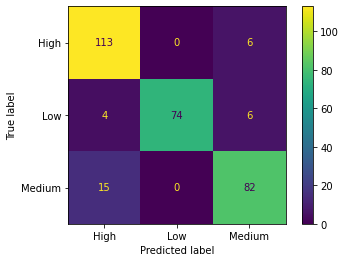

In [45]:
from sklearn.metrics import confusion_matrix,accuracy_score,ConfusionMatrixDisplay
result=confusion_matrix(y_test,y_pred)
labels=['High','Low','Medium']
cmd=ConfusionMatrixDisplay(result,display_labels=labels)
cmd.plot()

In [46]:
result

array([[113,   0,   6],
       [  4,  74,   6],
       [ 15,   0,  82]])

In [47]:
score=accuracy_score(y_test,y_pred)
score

0.8966666666666666